<a href="https://colab.research.google.com/github/Mawaxyl/Introduction_to_Keras_and_Tensorflow_with_Python/blob/main/Introduction_to_Keras_and_Tensorflow_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use the MNIST dataset to explain the concepts in the module. MNIST is a large database of handwritten digits commonly used in training and testing image processing systems. The image dimensions are 28x28 numpy arrays. Now let us import the images and prepare our dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Training data: {} {}".format(train_images.shape, train_labels.shape))

Training data: (60000, 28, 28) (60000,)


In [ ]:
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

Test data: (10000, 28, 28), (10000,)


In [ ]:
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels), class_labels))

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
plt.figure(figsize = (8, 5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'Label: 5')

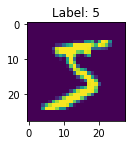

In [ ]:
plt.subplot(1, 3, 1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))

Text(0.5, 1.0, 'Label: 0')

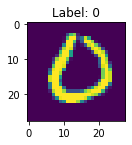

In [ ]:
plt.subplot(1, 3, 2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))

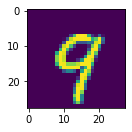

In [ ]:
plt.subplot(1, 3, 3)
plt.imshow(test_images[12])

In [ ]:
plt.show()

In [ ]:
#As usual, we scale our dataset to range between 0 and 1. In this dataset, the pixel values range from 0 to 255
# Divivding the data by 255 scales to the required range

train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Split training data to training and validation sets.
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

In [ ]:
print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("y_train: {}".format(y_train.shape))
print("y_val: {}".format(y_val.shape))

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [ ]:
# Reshape data from 28 * 28 array to a single array
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

In [ ]:
print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("test_images: {}".format(test_images.shape))

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [ ]:
#Encode labels to categorical variables
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

**Multilayer perceptron**

A perceptron is a supervised learning algorithm for binary classifiers that separates an input into two classes by learning linearly separable patterns. It is a single layer neural network that multiplies input feature vectors by their weights, creates a weighted sum by summing these products, then adds a bias and applies an activation function to give the final output. Perceptrons are unable to solve complex problems that are not linearly separable.



The MultiLayer Perceptron (MLP) is a network of connected perceptrons stacked in layers with several hidden layers in between the input and output layers. When there’s a single hidden layer, MLPs are referred to as vanilla neural networks. MLPs are feedforward neural networks where information is transferred in the forward direction from the input layer to the output layer. The input data to the network is fed to the input layer, computations are performed on the data in the hidden layers, and meaningful results returned in the output layer. The importance of the connections between layers is specified by the weights assigned.


**Backpropagation and its Derivative**

Backpropagation is the method of traversing the neural network in reverse (right to left) in order to obtain the gradient of neural network parameters with respect to a loss function. It is an iterative way of updating the weights in the network to get better predictions using a form of gradient descent until the minimum of the loss function is obtained. Different loss functions can be selected for various tasks. The loss is reduced in a controlled manner by taking small steps from the starting point to the final point which is the lowest possible point. The derivative of the loss function provides information on which direction to take when traversing. The weight can be updated using gradient descent which we will discuss later.

Simply put, backpropagation involves calculating the sum of errors in the network to obtain the loss function, and the partial derivative of the loss function with respect to individual weights. It also uses gradient descent to update the weights.

**Activation functions and Neural Networks Hyperparameters**

Activation functions introduce nonlinearity into the output of a neuron in a network to determine the output. This nonlinearity allows for the network to learn complex relationships between the input and response variables. Without activation functions in an artificial neural network, there will only be linear transformations on the input. The non-linear functions also allow for backpropagation because the gradients are obtained by derivatives of the functions and are used in updating weights. Some activation functions commonly used include sigmoid, tanh, relu, softmax, leaky relu and many others. When training the neural network, it is important to select the appropriate hyperparameters to improve the performance of the model. These are some of the hyperparameters:

***Hidden layers:*** this is a measure of the learning capacity of the model. The more hidden layers of neurons present in the network, the better the learning capacity of the model. When too many layers than necessary are provided in a model, there is a tendency for overfitting to occur.

***Learning rate:*** this controls how fast the model weights are updated before reaching optimal values. It will take the model a long time to reach the desired weights with a very small learning rate. In contrast, if the learning rate is much higher, the model might overshoot,pass the optimal point, and prevent convergence of the algorithm. This rate is how fast gradient descent is performed for backpropagation.

***Dropout:*** this is used to shut a percentage of the neurons in the network to prevent overfitting.

***Batch size:*** the number of data samples that can be propagated through the network before weights are updated. This is important in breaking up huge datasets into sizable batches to manage resources. This means that there are 10 batches for a dataset with 1000 samples and a batch size of 100.

***Epoch:*** it is the number of cycles that the learning algorithm goes through the entire dataset. When all batches are fed once, an epoch is completed.

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#input
#placeholder are not enabled in tf 2
X = tf.placeholder(tf.float32, [None, new_dimension])
Y = tf.placeholder(tf.float32, [None, no_labels])

In [ ]:
#create new model architecture
def multilayer_perception(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):
  #first layer
  first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
  first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))

  #second layer
  second_weight = tf.Variable(tf.random_uniform([first_layer_neurons, second_layer_neurons]))
  second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
  second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight), second_bias))

  #output layer
  final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
  final_bias = tf.Variable(tf.zeros([no_classes]))
  logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

  return logits

In [ ]:
logits = multilayer_perception(X, no_labels)

In [ ]:
learning_rate = 0.01
#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimiser = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
#initialize the variables
init = tf.global_variables_initializer()

In [ ]:
epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

In [ ]:
#train model
with tf.Session() as session:
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size

    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
      start += batch_size
      end += batch_size
      #average loss
      average_cost += loss/iteration
    print("Epoch========{}".format(epoch))

  #evaluate model
  prediction = tf.nn.softmax(logits)
  ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
  print("Accuracy: {}".format(accuracy.eval({X: test_images, Y: y_test})))

Epoch========0
Epoch========1
Epoch========2
Epoch========3
Epoch========4
Epoch========5
Epoch========6
Epoch========7
Epoch========8
Epoch========9
Epoch========10
Epoch========11
Epoch========12
Epoch========13
Epoch========14
Epoch========15
Epoch========16
Epoch========17
Epoch========18
Epoch========19
Accuracy: 0.9158999919891357


**Common Regularization for Deep Learning**

In previous modules, we have discussed regularisation and how it prevents overfitting in models. In deep learning, models are also susceptible to overfitting. As a result, different techniques have been developed to prevent overfitting. ***L1 & L2 regularization, dropout, data augmentation, and early stopping*** are some regularization methods.

**Dropout:** this is a frequently used technique in deep learning where units are ignored or dropped out in a neural network. A percentage of the neurons on each layer in the network are randomly selected and ignored, such that they do not make any contribution in the forward and backward pass. This automatically results in a much smaller network, where the neurons left are required to handle the representations that would have been used for predictions by the missing neurons, through the learning of more robust features. This process improves the generalization capabilities of the network, and reduces overfitting on the training data.

**Data augmentation:** training the model on a larger dataset is another way to prevent overfitting. Data augmentation involves increasing the size of the training set by introducing minor changes like rotating, cropping, flipping, translating, and blurring to generate synthetic data from the dataset.

**Early stopping:** when a model is trained for a longer period such that the validation error starts to increase, overfitting is said to occur. In early stopping, while fitting the model on the training data and evaluating on the validation set, when the validation error stops reducing or gets worse, the training process is terminated before the lowest training error is obtained, to prevent overfitting.

**Optimisation for Training Deep Neural Networks**

When solving deep learning problems, a loss function is defined to minimize loss using an **optimization algorithm** like **gradient descent, gradient descent with momentum, Adagrad, RMSProp, Adam, and others**. While there are several optimisation algorithms, there are also some challenges such as local minima, saddle points, vanishing gradients, etc, faced in deep learning optimisation.

**Local Minima:** neural networks aim to continue updating weights until the global minimum (the lowest point of the entire network) is attained. Local minima refers to the lowest points of localised portions of a graph. The value of a loss function is minimal at a point in the local region. It is possible for the function to be stuck at a local minimum because it is the best point in that locality, which makes it difficult to reach the global minimum where the lowest loss can be achieved.

**Vanishing Gradients:** this is a problem that occurs when training a network using gradient descent methods. Vanishing gradients make it difficult to update the weights in the earlier layers of the network, and worsens as the number of layers increases. As we know, with gradient descent, the gradient controls how much learning happens in the network during training. While backpropagating in deep neural networks, the gradients tend to get smaller, and with small gradients little or no learning is done, hence, resulting in poor performance of models.

Although we have only discussed some of the challenges in deep learning optimisation at a high level, we will now discuss some optimisation algorithms.

**Gradient Descent:** this is a common and established optimisation algorithm used to obtain the minimum of an objective function J using the negative of the gradient to continuously move towards the steepest point. It can be likened to finding the lowest point of a mountain. Gradient descent can be summed up in the equation below:


**Batch gradient descent**, **stochastic gradient descent**, and **mini-batch gradient descent** are the three variants of gradient descent. Which variant would be used is determined by the size of data available.


***Batch gradient descent*** computes the gradient of the cost function with the entire training set. ***Stochastic gradient descent (SDG)*** uses each sample in the training set to perform updates at a time. It is faster than ***batch gradient descent***. ***Mini-batch gradient descent*** combines the logic of other variants by using only mini-batches of training examples to update weights. It allows for a stable convergence, because the variance of the parameter updates are also reduced.

**Gradient Descent with Momentum:** similar to gradient descent, the addition of momentum to the algorithm helps speed up convergence, by accelerating the gradient vectors in the right direction. With gradient descent, movement is not always in the optimal direction. However, gradient descent with momentum oscillates in the right direction, by considering past gradients, and computing exponentially weighted averages of the gradients which are used to update the weights.

**Adagrad - Adaptive Gradients:** adagrad changes the learning rate for every update by tracking the sum of gradient squared, and uses it to adjust the gradients in the right direction. Larger updates are performed for infrequent parameters with high learning rates, while smaller updates are performed for frequent parameters with low learning rates. This can be interpreted thus; “the more a parameter is updated, the less updates are required for the parameter in future updates, to allow for the updates of other parameters”. This makes it a suitable choice for sparse data.

**RMSProp - Root Mean Square Propagation:** though similar to Adagrad, RMSProp provides an exponentially decaying average as opposed to the sum of the gradients by Adagrad. It changes the learning rate slower and converges faster than Adagrad, by using a decay rate to consider the gradients of recent time steps.

**Adam - Adaptive Moment Estimation:** this algorithm uses the first and second moments of gradients while adapting the learning rate for each weight of the neural network. It can be likened to RMSProp with momentum such that exponential moving averages of gradients are calculated then squared. It also benefits from the advantages of Adagrad in that it works well with sparse gradients.

**Optimization for training deep neural networks**

In [ ]:
#Building a Sequential Feed Forward Network in Keras

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
#Build the model object
model = Sequential()
# Build the input and the hidden layers
model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
model.add(Dense(128, activation='relu'))
# Build the output layer
model.add(Dense(no_labels, activation='softmax'))

Now that the model is in place, we configure the learning process using .compile(). Here we specify our loss function (or objective function). For our setting categorical cross entropy fits the bill, but in general other loss functions are available.

As for the optimizer of choice we'll use Adam with default settings. We could also instantiate an optimizer and set parameters before passing it to model.compile() but for this example the defaults will do.

We also choose which metrics will be evaluated during training and testing. We can pass any list of metrics - even build metrics ourselves - and have them displayed during training/testing.

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

Having compiled our model we can now start the training process. We have to specify how many times we want to iterate on the whole training set (epochs) and how many samples we use for one update to the model's weights (batch size).

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=1000)

test_loss, test_accuracy = model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
49000/50000 [============================>.] - ETA: 0s - loss: 0.6629 - acc: 0.8264WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
50000/50000 [==============================] - 1s 29us/sample - loss: 0.6557 - acc: 0.8283 - val_loss: 0.2534 - val_acc: 0.9249
Epoch 2/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.2318 - acc: 0.9334 - val_loss: 0.1859 - val_acc: 0.9483
Epoch 3/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.1722 - acc: 0.9503 - val_loss: 0.1509 - val_acc: 0.9579
Epoch 4/20
50000/50000 [==============================] - 1s 29us/sample - loss: 0.1344 - acc: 0

Text(0.5, 1.0, 'Loss Curves - before regularisation')

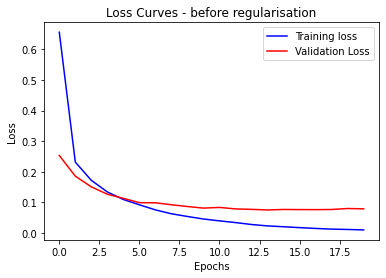

In [ ]:
#Check for Overfitting

plt.figure()
plt.plot(history.history['loss'], 'blue')
plt.plot(history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - before regularisation')

In [ ]:
from tensorflow.keras.layers import Dropout
reg_model = Sequential()
reg_model.add(Dense(256, activation='relu', input_shape=(new_dimension,)))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(128, activation='relu'))
reg_model.add(Dropout(0.4))
reg_model.add(Dense(no_labels, activation='softmax'))

reg_model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

reg_history = reg_model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                            epochs=20, batch_size=1000)
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.9592 - acc: 0.6966 - val_loss: 0.2918 - val_acc: 0.9166
Epoch 2/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.3727 - acc: 0.8896 - val_loss: 0.1968 - val_acc: 0.9437
Epoch 3/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.2817 - acc: 0.9180 - val_loss: 0.1608 - val_acc: 0.9535
Epoch 4/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.2291 - acc: 0.9325 - val_loss: 0.1361 - val_acc: 0.9608
Epoch 5/20
50000/50000 [==============================] - 2s 33us/sample - loss: 0.1974 - acc: 0.9410 - val_loss: 0.1199 - val_acc: 0.9648
Epoch 6/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.1725 - acc: 0.9489 - val_loss: 0.1093 - val_acc: 0.9688
Epoch 7/20
50000/50000 [==============================] - 2s 34us/sample - loss: 0.1575 - acc: 0.9526 - val_loss: 0.

In [ ]:
test_loss, test_accuracy = reg_model.evaluate(test_images, y_test)
print('Test loss: {}'.format(test_loss))
print('Test accuracy: {}'.format(test_accuracy))

Test loss: 0.07085466257409426
Test accuracy: 0.9793999791145325


Text(0.5, 1.0, 'Loss Curves - after regularisation')

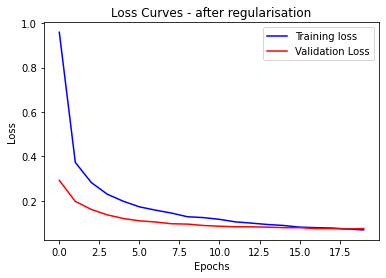

In [ ]:
plt.figure()
plt.plot(reg_history.history['loss'], 'blue')
plt.plot(reg_history.history['val_loss'], 'red')
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves - after regularisation')

**Making Predictions**

I added this just for more clarity and understanding. Let's use our model to predict some images and labels.

In [ ]:
predictions = model.predict([test_images]) # Make prediction
print(np.argmax(predictions[1000])) # Print out 9

9


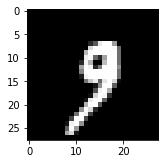

In [ ]:
# Let's see whether the image would turn out to be 9
# Remember that the input data to the network were flattened for the purpose of learning to a vector with a length of 784. Before displaying it, we need to convert it back to the size of 28 x 28 pixels.
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[1000].reshape(28,28), cmap="gray") # Import the image
plt.show() # Show the image


In [ ]:
# You can try out others and play around with them
predictions = model.predict([test_images]) # Make prediction
print(np.argmax(predictions[6700])) # Print out the number

4


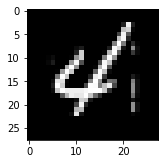

In [ ]:
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(test_images[6700].reshape(28,28), cmap="gray") # Import the image
plt.show() # Show the image